In [1]:
import matplotlib.pyplot as plt

import pandas as pd

from statsmodels.tsa.arima_model import ARIMA

In [2]:
data_folder = "./g-research-crypto-forecasting/"

In [3]:
train = pd.read_csv(data_folder + 'train.csv')
train

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target
0,1514764860,2,40.0,2376.580000,2399.500000,2357.140000,2374.590000,1.923301e+01,2373.116392,-0.004218
1,1514764860,0,5.0,8.530000,8.530000,8.530000,8.530000,7.838000e+01,8.530000,-0.014399
2,1514764860,1,229.0,13835.194000,14013.800000,13666.110000,13850.176000,3.155006e+01,13827.062093,-0.014643
3,1514764860,5,32.0,7.659600,7.659600,7.656700,7.657600,6.626713e+03,7.657713,-0.013922
4,1514764860,7,5.0,25.920000,25.920000,25.874000,25.877000,1.210873e+02,25.891363,-0.008264
...,...,...,...,...,...,...,...,...,...,...
24236801,1632182400,9,775.0,157.181571,157.250000,156.700000,156.943857,4.663725e+03,156.994319,NaN
24236802,1632182400,10,34.0,2437.065067,2438.000000,2430.226900,2432.907467,3.975460e+00,2434.818747,NaN
24236803,1632182400,13,380.0,0.091390,0.091527,0.091260,0.091349,2.193732e+06,0.091388,NaN
24236804,1632182400,12,177.0,0.282168,0.282438,0.281842,0.282051,1.828508e+05,0.282134,NaN


In [4]:
asset_details = pd.read_csv(data_folder + 'asset_details.csv')
asset_details

,Asset_ID,Weight,Asset_Name
0,2,2.397895,Bitcoin Cash
1,0,4.304065,Binance Coin
2,1,6.779922,Bitcoin
3,5,1.386294,EOS.IO
4,7,2.079442,Ethereum Classic
5,6,5.894403,Ethereum
6,9,2.397895,Litecoin
7,11,1.609438,Monero
8,13,1.791759,TRON
9,12,2.079442,Stellar


In [5]:
def collect_close_data(asset_id, data = train):
    df = data[data['Asset_ID'] == asset_id].reset_index(drop = True)
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')
    df = df.set_index('timestamp')
    asset_name = asset_details.loc[asset_details['Asset_ID'] == asset_id]['Asset_Name'].values[0]
    df['Close'] = df['Close'] / df['Close'][0]
    df = df.rename(columns = { 'Close': asset_name })
    return pd.DataFrame(df[asset_name])

In [6]:
data = []
for i in asset_details['Asset_ID'].to_numpy():
    data.append(collect_close_data(asset_id=i))
    
data_close = pd.concat(data, axis = 1)
data_close

,Bitcoin Cash,Binance Coin,Bitcoin,EOS.IO,Ethereum Classic,Ethereum,Litecoin,Monero,TRON,Stellar,Cardano,IOTA,Maker,Dogecoin
timestamp,,,,,,,,,,,,,,
2018-01-01 00:01:00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01 00:02:00,0.999030,0.998183,0.998406,0.999882,1.000773,0.999665,0.998446,0.999970,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01 00:03:00,0.998936,0.994701,0.996472,0.999164,1.022897,0.998639,1.003523,0.999180,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01 00:04:00,0.998306,0.996589,0.994070,0.997153,1.022124,0.998098,0.995863,0.996054,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01 00:05:00,0.998140,0.991325,0.990956,0.993784,1.021641,0.996205,0.993843,0.993838,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-20 23:56:00,0.228209,42.546073,3.097362,0.546910,1.896747,4.014464,0.697531,0.704152,2.482215,0.782773,7.951412,0.565820,2.052312,74.754811
2021-09-20 23:57:00,0.226856,42.461899,3.094546,0.545754,1.888877,4.009229,0.694812,0.701997,2.472456,0.780625,7.946560,0.564273,2.046901,74.565838
2021-09-20 23:58:00,0.226892,42.421805,3.092164,0.545306,1.886879,4.004561,0.694091,0.701610,2.472354,0.778987,7.941926,0.563411,2.048318,74.521441


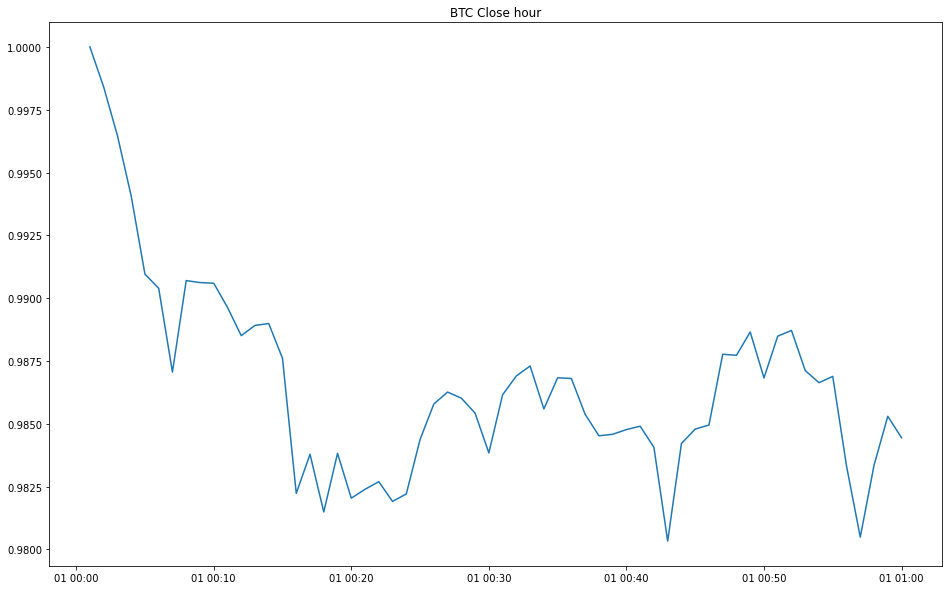

In [7]:
btc_hour = data_close['Bitcoin'].head(60)
plt.figure(figsize=(16, 10))
plt.plot(btc_hour)
plt.title('BTC Close hour')
plt.show()